In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import xgboost as xgb

In [2]:
d = open('./student-por.csv','r')
data_lst = [line.strip('\n').replace('"','').split(';') for line in d.readlines()]
data = pd.DataFrame(data_lst, columns = data_lst[0])
pd.set_option('display.max_columns', None)
data = data.drop(index = 0)
data = data.reset_index()
data = data.apply(pd.to_numeric,errors = 'ignore')
data.set_index(["index"], inplace=True)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
x = pd.DataFrame(data,columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],)
y = data.G3


In [4]:
from sklearn import preprocessing
lst = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
       'internet', 'romantic']
lbl = preprocessing.LabelEncoder()
for i in lst:
    x[i] = lbl.fit_transform(x[i].astype(str))

In [5]:
model = XGBClassifier()
model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [6]:
print(model.feature_importances_)

[0.02758871 0.01839897 0.03295255 0.0299009  0.02594944 0.02120274
 0.02630796 0.03042292 0.02701553 0.02835727 0.02886028 0.02613525
 0.02783945 0.02552576 0.02186291 0.01922901 0.02920904 0.02530569
 0.02446332 0.02364816 0.01369238 0.02004725 0.02594963 0.02231741
 0.02449606 0.02837704 0.02175664 0.02434264 0.02310719 0.0321002
 0.05472164 0.18891606]


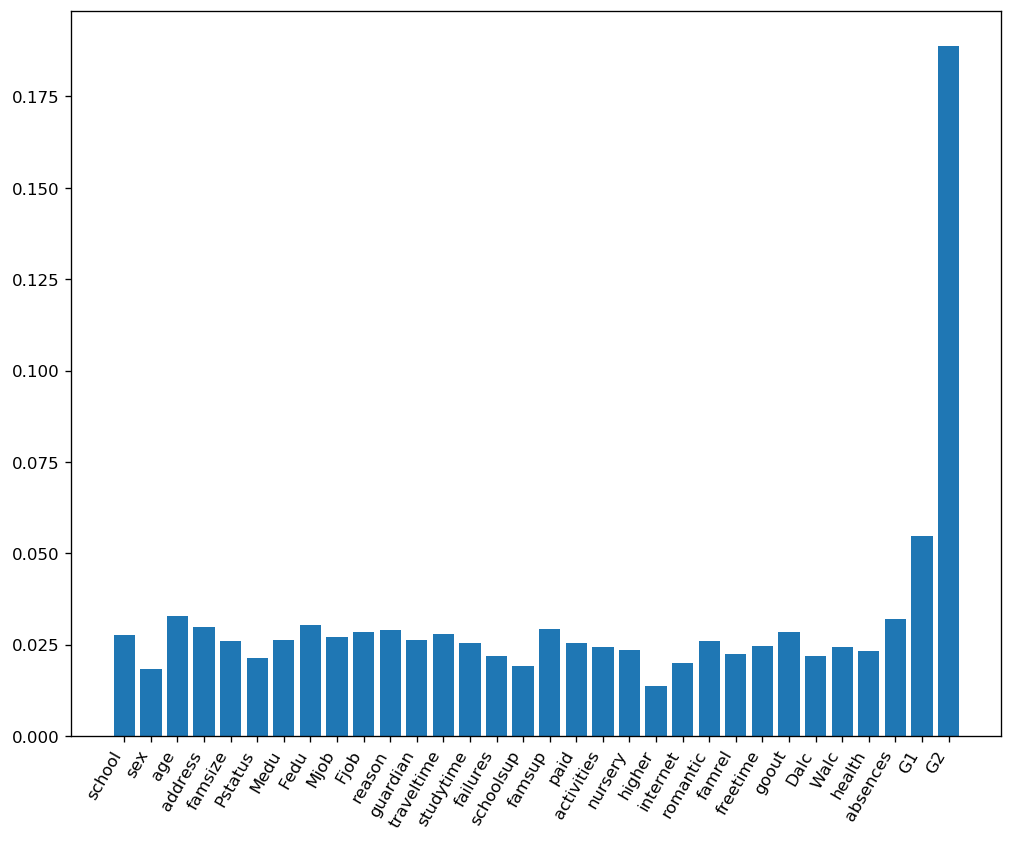

In [7]:
x_lst =['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
plt.figure(figsize=(10,8), dpi= 120)
plt.bar(x_lst, model.feature_importances_)
plt.gca().set_xticklabels(x_lst, rotation=60, horizontalalignment= 'right')
plt.show()